In [1]:
##Which Machine Learnings models are sensitive to Outliers?
#    1)Linear and Logistic Regression,Kmeans, PCA, Neural Networks, Hierarchial 

In [2]:
import pandas as pd
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Age'].isnull().sum()

177

<AxesSubplot:xlabel='Age', ylabel='Density'>

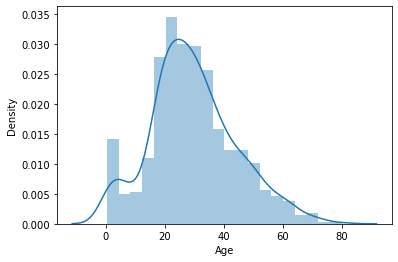

In [6]:
import seaborn as sns
sns.distplot(df['Age'].dropna())

/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

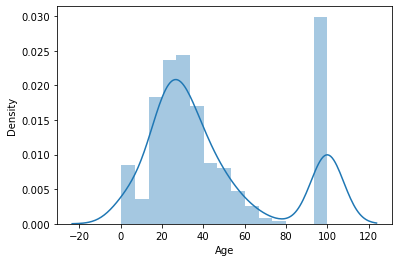

In [8]:
sns.distplot(df['Age'].fillna(100)) #create outliers

In [10]:
#Gaussian Distribution 

Text(0, 0.5, 'No of Passanger')

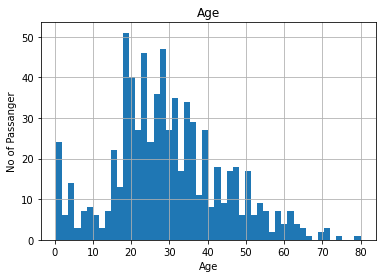

In [11]:
figure= df.Age.hist(bins = 50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passanger')

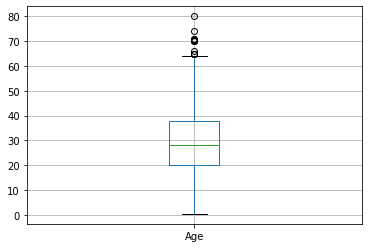

In [12]:
figure = df.boxplot(column='Age')

In [13]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
#Assuming Age follows a Gaussian distribution we will calculate the boundaries which differentiates the outliers

In [76]:
upper_boundary = df['Age'].mean() + 3*df['Age'].std()
lower_boundary = df['Age'].mean() - 3*df['Age'].std()
print(upper_boundary), print(df['Age'].mean())

73.27860964406094
29.69911764705882


(None, None)

In [20]:
#Let's compute IQR to calculate the bridges

In [22]:
IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)

In [23]:
IQR

17.875

In [25]:
lower_bridge = df['Age'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Age'].quantile(0.75) + (IQR*1.5)
print(lower_bridge), print(upper_bridge)

-6.6875
64.8125


(None, None)

In [28]:
#Extreme outliers
lower_bridge = df['Age'].quantile(0.25) - (IQR*3)
upper_bridge = df['Age'].quantile(0.75) + (IQR*3)
print(lower_bridge), print(upper_bridge)

-33.5
91.625


(None, None)

# Features are skewed

Text(0, 0.5, 'No of passanger')

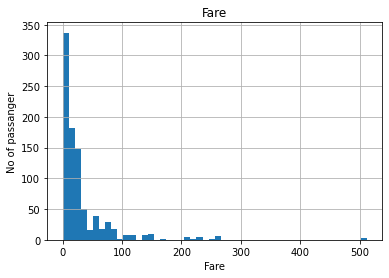

In [30]:
figure = df.Fare.hist(bins = 50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passanger')

<AxesSubplot:>

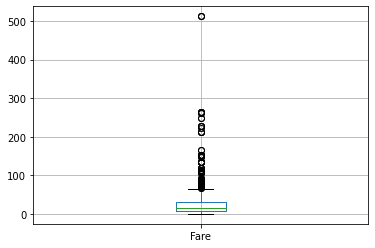

In [33]:
df.boxplot(column = 'Fare')

In [34]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [86]:
upper_boundary = df['Fare'].mean() + 3*df['Fare'].std()
lower_boundary = df['Fare'].mean() - 3*df['Fare'].std()
print(upper_boundary), print(df['Age'].mean())

181.2844937601173
29.69911764705882


(None, None)

In [44]:
# lets compute the IQR to calculate the boudaries
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [87]:
lower_bridge = df['Fare'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [88]:
#Extreme outliers
lower_bridge = df['Fare'].quantile(0.25) - (IQR*3)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [51]:
data = df.copy()
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [92]:
data.loc[data['Age']>=73,'Age']=73

In [93]:
data.head(16)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [113]:
data.loc[data['Fare']>=65, 'Fare'] =65

<AxesSubplot:>

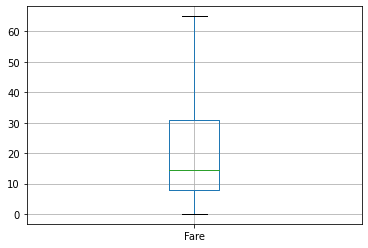

In [114]:
data.boxplot(column = 'Fare')

Text(0, 0.5, 'No of passanger')

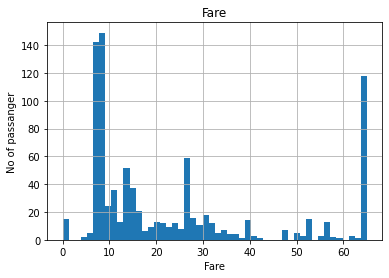

In [115]:
figure = data.Fare.hist(bins = 50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passanger')

Text(0, 0.5, 'No of passanger')

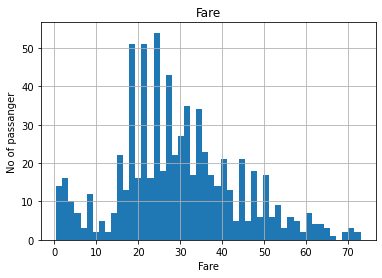

In [116]:
figure = data.Age.hist(bins = 50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passanger')

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(data[['Age','Fare']].fillna(0),data['Survived'], test_size = 0.3)

In [118]:
##Logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [119]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [120]:
print("Accuracy_score: {}".format(accuracy_score(y_test, y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test, y_pred1[:,1])))


Accuracy_score: 0.6753731343283582
roc_auc_score: 0.7326290125965055


In [121]:
##RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test, y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test, y_pred1[:,1])))

Accuracy_score: 0.6865671641791045
roc_auc_score: 0.7111220758112266


/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/ensemble/forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/tree/tree.py:1